# Boston House Price Prediction 

## Importing Libraries

In [60]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [61]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target
X = df.values

## Features Selection

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = Ridge(alpha=0.1)
Stand_coef_linear_reg = make_pipeline(scaler, model)

In [63]:
Stand_coef_linear_reg.fit(X, y)
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.747365
DIS,3.101755
RM,2.671520
RAD,2.651537
TAX,2.069083
PTRATIO,2.061320
NOX,2.057276
ZN,1.079439
CRIM,0.919569


## Data Pre-Processing

In [86]:
X = df[['LSTAT']].values
X_sc = StandardScaler()
y_sc = StandardScaler()
X_std = X_sc.fit_transform(X)
y_std = y_sc.fit_transform(y.reshape(-1, 1)).flatten()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.2, random_state=42)

In [125]:
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
r2_score(y_test, model.predict(X_test))

0.5429449156846744

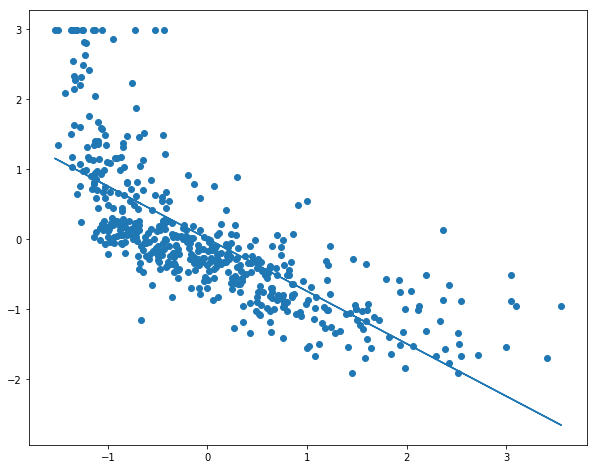

In [91]:
plt.figure(figsize=(10, 8))
plt.scatter(X_std, y_std)
plt.plot(X_std, model.predict(X_std))
plt.show()

## Polynomial Regression

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [146]:
X_poly = poly_reg.fit_transform(X_std)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_std, test_size = 0.2, random_state=42)
ridge_2 = Ridge(alpha=0.1)
ridge_2.fit(X_poly_train, y_poly_train)

X_fit = np.arange(X_std.min(), X_std.max(), 1)[:, np.newaxis]

quad_model_pred = ridge_2.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))
# quad_model_pred = ridge_2.predict(X_poly_train)

0.626928350898


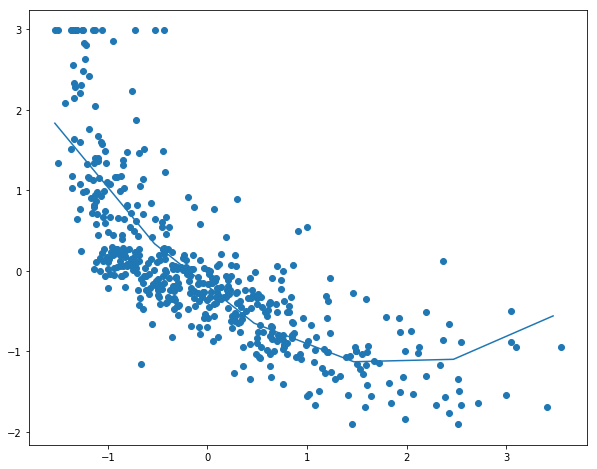

In [150]:
plt.figure(figsize=(10, 8))
plt.scatter(X_std, y_std)
plt.plot(X_fit, quad_model_pred)
print(r2_score(y_poly_test, ridge_2.predict(X_poly_test)))
plt.show()